# Importing libraries

In [4]:
!pip install wikipedia

  Created wheel for wikipedia: filename=wikipedia-1.4.0-cp37-none-any.whl size=11686 sha256=591a90f39ab81e5ad3cc216d4ede9adee312d4fd24fca46eed858a7b597de220
  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [5]:
import pandas as pd
import numpy as np
import wordcloud
from wordcloud import WordCloud, STOPWORDS
import re
from PIL import Image
import matplotlib.pyplot as plt
import wikipedia
%matplotlib inline

# Importing data from wikipedia

In [6]:
#Searching wikipedia for a topic and extracting text
keyword = input ("Enter topic for wikipedia search: ")
data_wiki = wikipedia.page(keyword)
text_data = data_wiki.content

#Cleaning the extracted text
text_data = re.sub(r'==.*?==+', '', text_data)
text_data = text_data.replace('\n', '')
print(text_data)

Enter topic for wikipedia search: pokemon
Pokémon, also known as Pocket Monsters in Japan, is a Japanese media franchise managed by The Pokémon Company, a company founded by Nintendo, Game Freak, and Creatures. The franchise was created by Satoshi Tajiri in 1995, and is centered on fictional creatures called "Pokémon". In Pokémon, humans, known as Pokémon Trainers, catch and train Pokémon to battle other Pokémon for sport. Games, shows and other works within the franchise are set in the Pokémon universe. The English slogan for the franchise is "Gotta Catch ‘Em All!".The franchise began as Pocket Monsters: Red and Green (later released outside of Japan as Pokémon Red and Blue), a pair of video games for the original Game Boy handheld system that were developed by Game Freak and published by Nintendo in February 1996. It soon became a media mix franchise adapted into various different media. Pokémon has since become the highest-grossing media franchise of all time. The original video gam

# Creating the cloud

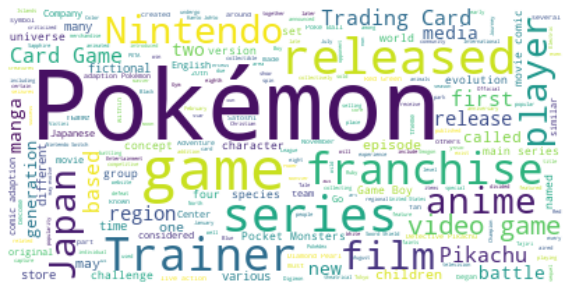

<Figure size 432x288 with 0 Axes>

In [43]:
#Generating our word cloud plot
wordcloud = WordCloud(background_color="white", max_words=10000,).generate(text_data)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig('data_cloud.jpg', format=None)

# Using a mask with pikachu

In [55]:
pikachu_mask = np.array(Image.open("blackpikachu.png"))
pikachu_mask

array([[0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0]], dtype=uint8)

In [56]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [57]:
# Transform your mask into a new one that will work with the function:
transformed_pikachu_mask = np.ndarray((pikachu_mask.shape[0],pikachu_mask.shape[1]), np.int32)

for i in range(len(pikachu_mask)):
    transformed_pikachu_mask[i] = list(map(transform_format, pikachu_mask[i]))

In [58]:
# Check the expected result of your mask
transformed_pikachu_mask

array([[255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1],
       [255, 255, 255, ...,   1,   1,   1],
       ...,
       [  1,   1,   1, ..., 255, 255, 255],
       [  1,   1,   1, ..., 255, 255, 255],
       [  1,   1,   1, ..., 255, 255, 255]], dtype=int32)

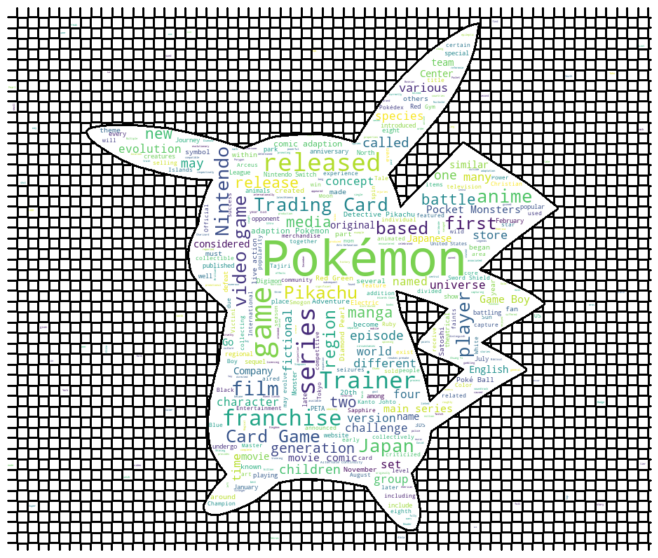

In [59]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=transformed_pikachu_mask, contour_width=3)

# Generate a wordcloud
wc.generate(text_data)

# store to file
wc.to_file("pikachu_black.pngwordcloud.png")

# show
plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()